# 3. Projekt zur Veranstaltung “Numerische Mathematik II“

## QR-Verfahren zur Eigenwertbestimmung

### Florian Bernhard 28258717

-------

#### Bibliotheks import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond
from numpy.linalg import eig

-----

# Aufgabe 1.0

In [3]:
def qr1(Matrix_A):
    tol = 1.0e-10
    err = 2*tol
    count = 0
    while err > tol and count < 100:
        count = count + 1
        Q, R = np.linalg.qr(Matrix_A)
        Matrix_A = R.dot(Q)
        eig = np.diag(Matrix_A)
        err = np.abs(np.linalg.norm(Matrix_A[-1, :]) - np.diag(Matrix_A)[-1])
        #print(count)
    return eig

In [4]:
def qr2(Matrix_A):
    m, n = np.shape(Matrix_A)
    tol = 1.0e-10
    for i in range(n - 1):
        count = 0
        err = 2 * tol
        while err > tol:
            sigma = np.diag(Matrix_A)[-1]
            Q, R = np.linalg.qr(Matrix_A[:n - i, :n - i] - sigma * np.eye(n - i))
            Matrix_A[:n - i, :n - i] = R.dot(Q) + sigma * np.eye(n - i)
            if count >= 10:
                eig = np.roots(np.poly(Matrix_A))
                return eig
            err = np.abs(np.linalg.norm(Matrix_A[-1, :])-np.diag(Matrix_A)[-1])
            count = count + 1
            #print(count)
    return np.diag(Matrix_A)

In [5]:
def sign(x):
    if x < 0:
        return -1
    else:
        return 1


def hessenberg_method(Matrix_A):
    m, n = np.shape(Matrix_A)
    H = np.copy(Matrix_A)
    Q = np.eye(m, n)
    for k in range(n-2):
        vk = H[k+1:n, k].reshape(n-(k+1), 1).copy()
        vk[0] = vk[0] + sign(np.sign(vk[0])) * np.linalg.norm(vk)
        vk = vk / np.linalg.norm(vk)
        H[k+1:m, k:n] = H[k+1:m, k:n] - 2*vk.dot((vk.T.dot(H[k+1:m, k:n])))
        H[:, k+1:n] = H[:, k+1:n] - 2*(H[:, k+1:n].dot(vk)).dot(vk.T)
        Q[k+1:] = Q[k+1:] - 2 * vk.dot(vk.T.dot(Q[k+1:]))
    return H

In [6]:
def qr3(Matrix_A):
    return qr2(hessenberg_method(Matrix_A))

----

# Aufgabe 2.0

In [6]:
A = np.array([[5.0, 4.0, 2.0], [0.0, 1.0, -1.0], [-1.0, -1.0, 3.0]])
B = np.array([[-1.0, 1.0, 3.0], [3.0, 3.0, -2.0], [-5.0, 2.0, 7.0]])
C = np.array([[-5.0, -10.0, -10.0, 5.0], [4.0, 16.0, 11.0, -8.0], [12.0, 13.0, 8.0, -4.0], [22.0, 48.0, 28.0, -19.0]])
D = np.array([[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0], [-1.0, 0.0, 0.0, 0.0]])

In [7]:
cond(A)

9.88662789094481

In [8]:
cond(B)

13.60874693634

In [9]:
cond(C)

198.83376471744333

In [10]:
cond(D)

1.0

---

In [11]:
eig_A = np.linalg.eigvals(A)
print(eig_A)

[4.00000002 3.99999998 1.        ]


In [12]:
eig_B = np.linalg.eigvals(B)
print(eig_B)

[3.00001088+1.88367701e-05j 3.00001088-1.88367701e-05j
 2.99997825+0.00000000e+00j]


In [13]:
eig_C = np.linalg.eigvals(C)
print(eig_C)

[ 1.03007880e-14+5.j  1.03007880e-14-5.j -1.49880108e-15+5.j
 -1.49880108e-15-5.j]


In [14]:
eig_D = np.linalg.eigvals(D)
print(eig_D)

[0.+1.j 0.-1.j 0.+1.j 0.-1.j]


---

In [17]:
qr1(A)

array([4.10241803, 3.89756825, 1.00001372])

In [31]:
print(eig_A)

[4.00000002 3.99999998 1.        ]


In [19]:
qr1(B)

array([3.06241857, 2.99583712, 2.94174431])

In [32]:
print(eig_B)

[3.00001088+1.88367701e-05j 3.00001088-1.88367701e-05j
 2.99997825+0.00000000e+00j]


In [21]:
qr1(C)

array([ -5.,  16.,   8., -19.])

In [33]:
print(eig_C)

[ 1.03007880e-14+5.j  1.03007880e-14-5.j -1.49880108e-15+5.j
 -1.49880108e-15-5.j]


In [24]:
qr1(D)

array([0., 0., 0., 0.])

In [34]:
print(eig_D)

[0.+1.j 0.-1.j 0.+1.j 0.-1.j]


### Zusammenfassung der Ergebnisse:
Für die Matrix A konvergiert das Verfahren qr1() mit 37 Iterationen [ print(it) ist in der Funktion ausgeklammert ] gegen die eigentlichen Eigenwerte. Dabei ist jedoch immer noch ein relativ großer Fehler zu verzeichnen, es lassen sich die Eigenwerte schon grob deuten, jedoch fehlt immernoch die gewisse Genauigkeit, was an der Uneffizienz des einfachen QR Algorithmus liegt.

Für die weiten Matrizen B-D konvergiert das Verfahren nicht, der Iterationscounter überschreitet das Maximal von Iterationen. Dies is damit zu begründen, das bei complexen Eigenwerten das Verfahren nicht konvergiert und zudem auch nicht ausgelegt ist diese zu bestimmen. So sehen wir, dass diese Methode für diese Matrizen nicht mal zur groben Einschätzung der Eigenwerte zu gebrauchen ist.

---

In [35]:
qr2(A)

array([1.        , 4.00067689, 3.99932311])

In [36]:
print(eig_A)

[4.00000002 3.99999998 1.        ]


In [37]:
qr2(B)

array([3.00001204+2.0846281e-05j, 3.00001204-2.0846281e-05j,
       2.99997593+0.0000000e+00j])

In [38]:
print(eig_B)

[3.00001088+1.88367701e-05j 3.00001088-1.88367701e-05j
 2.99997825+0.00000000e+00j]


In [39]:
qr2(C)

array([-2.55244437e-09+5.00000001j, -2.55244437e-09-5.00000001j,
        2.55244326e-09+4.99999999j,  2.55244326e-09-4.99999999j])

In [40]:
print(eig_C)

[ 1.03007880e-14+5.j  1.03007880e-14-5.j -1.49880108e-15+5.j
 -1.49880108e-15-5.j]


In [41]:
qr2(D)

array([ 4.89111182e-12+1.00000001j,  4.89111182e-12-1.00000001j,
       -4.89091753e-12+0.99999999j, -4.89091753e-12-0.99999999j])

In [42]:
print(eig_D)

[0.+1.j 0.-1.j 0.+1.j 0.-1.j]


### Zusammenfassung der Ergebnisse:
Das Verfahren qr2() konvergiert für die Matrix A mit nur 8 Iterationen gegen das gewünschte Ergebnis, unter berücksichtigung von Rundungsfehlern. 

Für die Matrix B konvergiert das Verfahren gegen den Realteil der eigentlichen Eigenwerte mit 13 Iterationen, jedoch wird hierbei nicht der Complexe Anteil berechnent, was an der Fehlerfunktion liegt. Diese verzeichnet weitehin eine Konvergenz, wenn diese Ausbleiben würde, wechselt der Algorithmus zum Charakteristischen Polynom.

Für die Matrizen C & D wird der maximale Iterationscount von 50 überschritten und es wird das Charakteristische Polynom der Matrizen berechnet, was uns erlaubt auch den Fall von complexen Eigenwerten abzudecken. Die Ergebnisse sind unter berückstichtigung der Rundungsfehler Genau genug um die Eigenwerte mit diesem Verfahren numerisch anzunähern.

---

In [43]:
qr3(A)

array([1.        , 4.00444925, 3.99555075])

In [47]:
print(eig_A)

[4.00000002 3.99999998 1.        ]


In [44]:
qr3(B)

array([2.99179573, 2.99996048, 3.00824379])

In [48]:
print(eig_B)

[3.00001088+1.88367701e-05j 3.00001088-1.88367701e-05j
 2.99997825+0.00000000e+00j]


In [45]:
qr3(C)

array([-3.25470206e-11+5.00000004j, -3.25470206e-11-5.00000004j,
        3.25496297e-11+4.99999996j,  3.25496297e-11-4.99999996j])

In [49]:
print(eig_C)

[ 1.03007880e-14+5.j  1.03007880e-14-5.j -1.49880108e-15+5.j
 -1.49880108e-15-5.j]


In [46]:
qr3(D)

array([ 7.11120340e-09+1.j,  7.11120340e-09-1.j, -7.11120321e-09+1.j,
       -7.11120321e-09-1.j])

In [50]:
print(eig_D)

[0.+1.j 0.-1.j 0.+1.j 0.-1.j]


### Zusammenfassung der Ergebnisse:
Das Verfahren qr3() konvergiert für die Matrix A mit nur 1 Iteration gegen das gewünschte Ergebnis, unter berücksichtigung von Rundungsfehlern. Durch die übergebene Hessenbergform ersparen wir uns hierbei 7 Iterationen

Für die Matrix B konvergiert das Verfahren gegen den Realteil der eigentlichen Eigenwerte mit 1 Iteration, jedoch wird hierbei nicht der Complexe Anteil berechnent, was an der Fehlerfunktion liegt. Diese verzeichnet weitehin eine Konvergenz, wenn diese Ausbleiben würde, wechselt der Algorithmus zum Charakteristischen Polynom.

Für die Matrizen C & D wird der maximale Iterationscount von 50 überschritten und es wird das Charakteristische Polynom der Matrizen berechnet, was uns erlaubt auch den Fall von complexen Eigenwerten abzudecken. Die Ergebnisse sind unter berückstichtigung der Rundungsfehler Genau genug um die Eigenwerte mit diesem Verfahren numerisch anzunähern.

----

# Aufgabe 3.0

In [7]:
def potenz_method(Matrix_A,x):
    n = 0
    tol = 1.0e-5
    err = 2*tol
    x = x/np.linalg.norm(x)
    while err > tol:
        n = n+1
        a = Matrix_A.dot(x)
        eig = np.transpose(x).dot(a)
        x_prev = x
        x = a/np.linalg.norm(a)
        err = np.linalg.norm(abs(x) - abs(x_prev))
    return eig, x

In [8]:
def gershgorin_disk(Matrix_A):
    m, n = np.shape(Matrix_A)
    R = np.zeros(n) 
    estimated_eig = np.zeros((m,2))
    for i in range(n):
        R[i] = sum(abs(Matrix_A[i, :])) - abs(Matrix_A[i, i])

    eigenvalues = np.linalg.eigvals(Matrix_A)

    fig, ax = plt.subplots()
    for k in range(n):
        x, y = Matrix_A[k,k].real, Matrix_A[k,k].imag
        ax.add_artist( plt.Circle((x, y), R[k], alpha=0.5) )
        plt.plot(eigenvalues[k].real, eigenvalues[k].imag, 'k+')
        estimated_eig[k, 0] = np.diag(Matrix_A)[k]-R[k]
        estimated_eig[k, 1] = np.diag(Matrix_A)[k]+R[k]
    ax.axis([-2.5, 2.5, -2.5, 2.5])
    ax.set_aspect(1)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title("Gershgorin disks and eigenvalues $x + iy$")
    plt.show()
    return estimated_eig

In [9]:
def inv_shift_pot_method(Matrix_A, x, lamda):
    n = 0
    tol = 1.0e-5
    err = 2 * tol
    x = x / np.linalg.norm(x)
    while err > tol:
        n = n + 1
        a = np.linalg.solve(Matrix_A-lamda*np.eye(len(Matrix_A)), x)
        eig = np.transpose(x).dot(a)
        x_prev = x
        x = a / np.linalg.norm(a)
        err = np.linalg.norm(abs(x) - abs(x_prev))
    eig = (1/eig) + lamda
    return eig, x

In [10]:
def rayley_method(Matrix_A, x, lamda):
    n = 0
    tol = 1.0e-5
    err = 2 * tol
    x = x / np.linalg.norm(x)
    while err > tol:
        n = n + 1
        a = np.linalg.solve(Matrix_A-lamda*np.eye(len(Matrix_A)), x)
        eig = np.transpose(x).dot(a)
        x_prev = x
        x = a / np.linalg.norm(a)
        lamda = np.transpose(x).dot(Matrix_A.dot(x))
        err = np.linalg.norm(abs(x) - abs(x_prev))
    eig = (1/eig) + lamda
    return eig, x

In [11]:
"""M = np.array([[0,1,0,0,0,0,0,0,1,0,0,0,0,0,0],
              [0,0,1,0,1,0,1,0,0,0,0,0,0,0,0],
              [0,1,0,0,0,1,0,1,0,0,0,0,0,0,0],
              [0,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
              [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,1,1,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
              [0,0,0,0,0,0,1,1,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,1,0,0,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0]
              ])
              """
M = np.array([[0,1/2,0,0,0,0,0,0,1/2,0,0,0,0,0,0],
              [0,0,1/3,0,1/3,0,1/3,0,0,0,0,0,0,0,0],
              [0,1/3,0,0,0,1/3,0,1/3,0,0,0,0,0,0,0],
              [0,0,1/2,0,0,0,0,0,0,0,0,1/2,0,0,0],
              [1/2,0,0,0,0,0,0,0,0,1/2,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,1/2,1/2,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,1/2,1/2,0,0,0,0],
              [0,0,0,1/2,0,0,0,0,0,0,1/2,0,0,0,0],
              [0,0,0,0,1/3,1/3,0,0,0,1/3,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,1/3,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1/3],
              [0,0,0,0,0,0,1/3,1/3,0,0,1/3,0,0,0,0],
              [0,0,0,0,0,0,0,0,1/2,0,0,0,0,1/2,0],
              [0,0,0,0,0,0,0,0,0,1/3,1/3,0,0,0,1/3],
              [0,0,0,0,0,0,0,0,0,0,0,1/3,0,1/3,0]
              ])


q = 0.15
m, n = np.shape(M)
E = (1-q) * M + q * (1/n) * np.ones((n, n))
print(E)

[[0.01       0.435      0.01       0.01       0.01       0.01
  0.01       0.01       0.435      0.01       0.01       0.01
  0.01       0.01       0.01      ]
 [0.01       0.01       0.29333333 0.01       0.29333333 0.01
  0.29333333 0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01      ]
 [0.01       0.29333333 0.01       0.01       0.01       0.29333333
  0.01       0.29333333 0.01       0.01       0.01       0.01
  0.01       0.01       0.01      ]
 [0.01       0.01       0.435      0.01       0.01       0.01
  0.01       0.01       0.01       0.01       0.01       0.435
  0.01       0.01       0.01      ]
 [0.435      0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.435      0.01       0.01
  0.01       0.01       0.01      ]
 [0.01       0.01       0.01       0.01       0.01       0.01
  0.01       0.01       0.01       0.435      0.435      0.01
  0.01       0.01       0.01      ]
 [0.01       0.01       0.01     

In [79]:
potenz_method(E,np.ones((n)))

(0.8190399118240539,
 array([0.34846988, 0.32148693, 0.31582955, 0.33617627, 0.30159927,
        0.18044185, 0.18044185, 0.27958834, 0.26242981, 0.14510897,
        0.11498462, 0.24439426, 0.28800465, 0.20496046, 0.20092367]))

In [81]:
np.linalg.eig(E)

(array([ 8.19040293e-01+0.j        , -1.66516491e-01+0.49565682j,
        -1.66516491e-01-0.49565682j, -2.36823192e-01+0.39607532j,
        -2.36823192e-01-0.39607532j, -2.65870530e-01+0.20898397j,
        -2.65870530e-01-0.20898397j, -2.37865289e-01+0.18865998j,
        -2.37865289e-01-0.18865998j,  5.00661271e-01+0.j        ,
         3.99966898e-01+0.j        ,  1.36491670e-01+0.j        ,
         1.07990873e-01+0.j        , -6.27163514e-18+0.j        ,
        -3.06024214e-16+0.j        ]),
 array([[ 3.48472219e-01+0.j        ,  3.96952320e-01+0.j        ,
          3.96952320e-01-0.j        , -2.30484943e-01-0.26356207j,
         -2.30484943e-01+0.26356207j,  4.51723353e-01+0.j        ,
          4.51723353e-01-0.j        , -1.95100920e-01+0.34707817j,
         -1.95100920e-01-0.34707817j, -4.67669146e-01+0.j        ,
         -4.53957720e-01+0.j        , -2.99817733e-01+0.j        ,
          1.35454548e-01+0.j        , -5.47921763e-02+0.j        ,
         -3.03037596e-01+0.j  

In [12]:
q = 0
m, n = np.shape(M)
F = (1-q) * M + q * (1/n) * np.ones((n, n))
print(F)

[[0.         0.5        0.         0.         0.         0.
  0.         0.         0.5        0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.33333333 0.
  0.33333333 0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.33333333 0.         0.         0.         0.33333333
  0.         0.33333333 0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.         0.         0.         0.         0.         0.5
  0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.         0.         0.         0.5        0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.5        0.5        0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.       

In [84]:
potenz_method(F,np.ones((n)))

(0.7585927831651307,
 array([0.40117909, 0.35130179, 0.33252419, 0.3568096 , 0.3426918 ,
        0.12426878, 0.12426878, 0.28118108, 0.25736655, 0.11874488,
        0.06979134, 0.20882695, 0.27023794, 0.15263719, 0.15882997]))

In [83]:
np.linalg.eig(F)

(array([ 7.58592433e-01+0.j        , -1.94057187e-01+0.58241957j,
        -1.94057187e-01-0.58241957j, -2.78544005e-01+0.4660399j ,
        -2.78544005e-01-0.4660399j , -3.06998512e-01+0.25274129j,
        -3.06998512e-01-0.25274129j, -2.80222502e-01+0.21417584j,
        -2.80222502e-01-0.21417584j,  5.90427783e-01+0.j        ,
         4.84960006e-01+0.j        ,  1.24614180e-01+0.j        ,
         1.61050009e-01+0.j        , -1.87853692e-16+0.j        ,
         2.72609709e-17+0.j        ]),
 array([[-4.01181078e-01+0.j        , -3.96891492e-01+0.j        ,
         -3.96891492e-01-0.j        , -2.30371727e-01-0.26990501j,
         -2.30371727e-01+0.26990501j,  4.70467033e-01+0.j        ,
          4.70467033e-01-0.j        , -2.00075513e-01+0.33042258j,
         -2.00075513e-01-0.33042258j, -5.04643764e-01+0.j        ,
          4.59441418e-01+0.j        , -1.51388090e-01+0.j        ,
          3.04486808e-01+0.j        ,  1.96783865e-01+0.j        ,
         -4.31548714e-01+0.j  

In [13]:
q = 0.45
m, n = np.shape(M)
G = (1-q) * M + q * (1/n) * np.ones((n, n))
print(G)

[[0.03       0.305      0.03       0.03       0.03       0.03
  0.03       0.03       0.305      0.03       0.03       0.03
  0.03       0.03       0.03      ]
 [0.03       0.03       0.21333333 0.03       0.21333333 0.03
  0.21333333 0.03       0.03       0.03       0.03       0.03
  0.03       0.03       0.03      ]
 [0.03       0.21333333 0.03       0.03       0.03       0.21333333
  0.03       0.21333333 0.03       0.03       0.03       0.03
  0.03       0.03       0.03      ]
 [0.03       0.03       0.305      0.03       0.03       0.03
  0.03       0.03       0.03       0.03       0.03       0.305
  0.03       0.03       0.03      ]
 [0.305      0.03       0.03       0.03       0.03       0.03
  0.03       0.03       0.03       0.305      0.03       0.03
  0.03       0.03       0.03      ]
 [0.03       0.03       0.03       0.03       0.03       0.03
  0.03       0.03       0.03       0.305      0.305      0.03
  0.03       0.03       0.03      ]
 [0.03       0.03       0.03     

In [86]:
potenz_method(G,np.ones((n)))

(0.9049015402660792,
 array([0.29615489, 0.28862098, 0.28802051, 0.29509624, 0.27318152,
        0.23600989, 0.23600989, 0.26961742, 0.26765064, 0.18451001,
        0.17384087, 0.26476683, 0.28333815, 0.24644365, 0.23067652]))

In [87]:
np.linalg.eig(G)

(array([ 9.04900969e-01+0.j        , -1.09720945e-01+0.32187028j,
        -1.09720945e-01-0.32187028j, -1.53330603e-01+0.25621497j,
        -1.53330603e-01-0.25621497j, -1.82088427e-01+0.13127352j,
        -1.82088427e-01-0.13127352j, -1.49980560e-01+0.1273046j ,
        -1.49980560e-01-0.1273046j ,  3.23609704e-01+0.j        ,
         2.51888720e-01+0.j        ,  8.78505140e-02+0.j        ,
         7.19911627e-02+0.j        ,  2.28844502e-17+0.j        ,
        -1.15918324e-16+0.j        ]),
 array([[ 2.96156772e-01+0.j        ,  3.95924154e-01+0.j        ,
          3.95924154e-01-0.j        , -2.28553585e-01-0.25096546j,
         -2.28553585e-01+0.25096546j, -4.20478447e-01+0.j        ,
         -4.20478447e-01-0.j        , -1.75219177e-01+0.36105672j,
         -1.75219177e-01-0.36105672j, -4.48028161e-01+0.j        ,
          4.39690027e-01+0.j        , -2.90972596e-01+0.j        ,
         -1.04206892e-01+0.j        , -1.36867469e-01+0.j        ,
         -2.90513272e-01+0.j  

In [14]:
q = 0.75
m, n = np.shape(M)
H = (1-q) * M + q * (1/n) * np.ones((n, n))
print(H)

[[0.05       0.175      0.05       0.05       0.05       0.05
  0.05       0.05       0.175      0.05       0.05       0.05
  0.05       0.05       0.05      ]
 [0.05       0.05       0.13333333 0.05       0.13333333 0.05
  0.13333333 0.05       0.05       0.05       0.05       0.05
  0.05       0.05       0.05      ]
 [0.05       0.13333333 0.05       0.05       0.05       0.13333333
  0.05       0.13333333 0.05       0.05       0.05       0.05
  0.05       0.05       0.05      ]
 [0.05       0.05       0.175      0.05       0.05       0.05
  0.05       0.05       0.05       0.05       0.05       0.175
  0.05       0.05       0.05      ]
 [0.175      0.05       0.05       0.05       0.05       0.05
  0.05       0.05       0.05       0.175      0.05       0.05
  0.05       0.05       0.05      ]
 [0.05       0.05       0.05       0.05       0.05       0.05
  0.05       0.05       0.05       0.175      0.175      0.05
  0.05       0.05       0.05      ]
 [0.05       0.05       0.05     

In [89]:
potenz_method(H,np.ones((n)))

(0.9653681235535863,
 array([0.26927721, 0.26847851, 0.26845817, 0.26924989, 0.26404607,
        0.25785294, 0.25785294, 0.26378938, 0.26458872, 0.22340091,
        0.2214455 , 0.26439789, 0.26815906, 0.25984572, 0.24550711]))

In [90]:
np.linalg.eig(H)

(array([ 9.65368203e-01+0.j        ,  1.47044983e-01+0.j        ,
        -5.06766065e-02+0.14705769j, -5.06766065e-02-0.14705769j,
         1.12990627e-01+0.j        , -6.97452303e-02+0.11643611j,
        -6.97452303e-02-0.11643611j, -8.71161588e-02+0.05955029j,
        -8.71161588e-02-0.05955029j, -6.67625520e-02+0.05878468j,
        -6.67625520e-02-0.05878468j,  3.97424715e-02+0.j        ,
         3.34548110e-02+0.j        , -4.72994915e-17+0.j        ,
         3.33309204e-17+0.j        ]),
 array([[-2.69276486e-01+0.j        ,  4.41372199e-01+0.j        ,
          3.93184530e-01+0.j        ,  3.93184530e-01-0.j        ,
          4.29625709e-01+0.j        ,  2.23489029e-01+0.23914861j,
          2.23489029e-01-0.23914861j, -3.97911549e-01+0.j        ,
         -3.97911549e-01-0.j        ,  1.54680960e-01-0.35492406j,
          1.54680960e-01+0.35492406j, -2.82627743e-01+0.j        ,
         -7.50230956e-02+0.j        , -3.52032376e-01+0.j        ,
         -1.01616588e-01+0.j  

### Zusammenfassung der Ergebnisse:
Für q = 0.75 - 6 Iterationen. 
    q = 0.45 - 11 Iterationen.
    q = 0.15 - 24 Iterationen.
    q = 0    - 51 Iterationen.

---

# Aufgabe 4.0

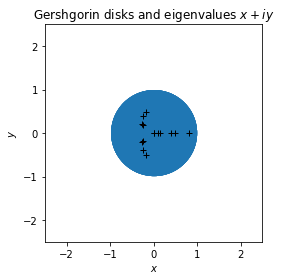

array([[-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.41333333,  0.43333333],
       [-0.41333333,  0.43333333],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.98      ,  1.        ],
       [-0.69666667,  0.71666667]])

In [91]:
gershgorin_disk(E)

In [60]:
inv_shift_pot_method(E, np.ones((n)), 0.5)

(0.5006612705798495,
 array([-0.46766915, -0.22557316,  0.07197839,  0.2848686 , -0.48176195,
         0.01994435,  0.01994435,  0.34157501, -0.31951515, -0.09402085,
         0.12335418,  0.26944273, -0.15738106,  0.13995444,  0.22672927]))

In [62]:
inv_shift_pot_method(E, np.ones((n)), 0.3)

(0.3999669477199781,
 array([-0.45395673, -0.35434036, -0.30665121, -0.32916982, -0.37734444,
         0.21353096,  0.21353096, -0.26233392, -0.05305135,  0.11866515,
         0.10211553,  0.0166978 ,  0.19725476,  0.2585148 ,  0.17389078]))

Für lambda = 0.5 - 4 Iterationen. Für lambda = 0.3 - 24 Iterationen. Das liegt daran dass die Konvergenzgeschwindigkeit von den Quotienten zwischen (Eigenwert(i)/den größten Eigenwert) z.B 0.5/0.8 = 0.625
0.3/0.8 = 0.375

In [61]:
rayley_method(E, np.ones((n)), 0.5)

(0.5006612700920627,
 array([ 0.46766915,  0.22557315, -0.07197839, -0.2848686 ,  0.48176195,
        -0.01994435, -0.01994435, -0.34157502,  0.31951515,  0.09402085,
        -0.12335418, -0.26944273,  0.15738106, -0.13995444, -0.22672927]))

In [63]:
rayley_method(E, np.ones((n)), 0.3)

(0.3999668986836183,
 array([ 0.45395772,  0.35434175,  0.30665145,  0.3291684 ,  0.37734477,
        -0.21353092, -0.21353092,  0.26233258,  0.05305024, -0.11866607,
        -0.10211456, -0.01669852, -0.19725517, -0.25851378, -0.17389027]))

Für lambda = 0.5 - 4 Iterationen. Für lambda = 0.3 - 8 Iterationen. Das liegt daran dass das Verfahren sein lamda in der Schleife updated und somit ein schnelleres Konvergenzverfahren erziehlen kann.

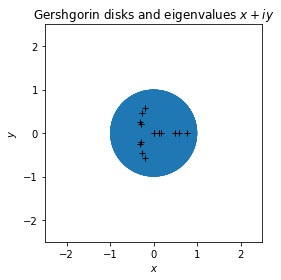

array([[-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-0.33333333,  0.33333333],
       [-0.33333333,  0.33333333],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-1.        ,  1.        ],
       [-0.66666667,  0.66666667]])

In [94]:
gershgorin_disk(F)

In [70]:
inv_shift_pot_method(F, np.ones((n)), 0.6)

(0.5904277808116448,
 array([ 0.50464379,  0.26365894, -0.02463133, -0.22409917,  0.50938582,
        -0.01773981, -0.01773981, -0.2895482 ,  0.33225249,  0.09686729,
        -0.11781543, -0.23999742,  0.17157942, -0.12964197, -0.20868451]))

In [73]:
inv_shift_pot_method(F, np.ones((n)), 0.4)

(0.4849603444155255,
 array([-0.45944435, -0.37036742, -0.33854078, -0.37640639, -0.38006788,
         0.17976793,  0.17976793, -0.30193664, -0.07525768,  0.09080805,
         0.08355247, -0.02654299,  0.13211443,  0.20339775,  0.12155925]))

Für lambda = 0.6 - 7 Iterationen. Für lambda = 0.4 - 13 Iterationen.

In [71]:
rayley_method(F, np.ones((n)), 0.6)

(0.5904287980831231,
 array([-0.50464376, -0.26365891,  0.02463137,  0.22409922, -0.5093858 ,
         0.0177398 ,  0.0177398 ,  0.28954824, -0.33225249, -0.0968673 ,
         0.11781543,  0.23999744, -0.17157943,  0.12964197,  0.20868452]))

In [74]:
rayley_method(F, np.ones((n)), 0.4)

(0.4849600063389832,
 array([ 0.45944142,  0.37036628,  0.33854219,  0.37640984,  0.38006467,
        -0.17976837, -0.17976837,  0.30194036,  0.07525515, -0.09080909,
        -0.08355185,  0.02654525, -0.13211633, -0.20339742, -0.12155791]))

Für lambda = 0.6 - 5 Iterationen. Für lambda = 0.4 - 5 Iterationen.

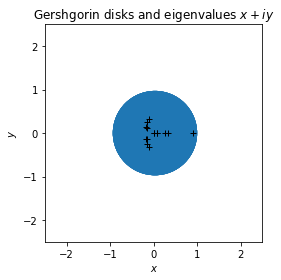

array([[-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.57333333,  0.63333333],
       [-0.57333333,  0.63333333],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.94      ,  1.        ],
       [-0.75666667,  0.81666667]])

In [97]:
gershgorin_disk(G)

In [78]:
inv_shift_pot_method(G, np.ones((n)), 0.3)

(0.323609748188863,
 array([-0.44802763, -0.20658074,  0.09390217,  0.31209675, -0.46645748,
         0.02074955,  0.02074955,  0.36442104, -0.31208215, -0.09232277,
         0.12529965,  0.28192093, -0.15012367,  0.14398183,  0.23401118]))

In [79]:
inv_shift_pot_method(G, np.ones((n)), 0.2)

(0.25188879712832163,
 array([-0.43968924, -0.33258596, -0.27141305, -0.27927723, -0.3665008 ,
         0.24045753,  0.24045753, -0.22127915, -0.03048704,  0.14365412,
         0.11626013,  0.0552722 ,  0.25687009,  0.30543467,  0.21923094]))

Für lambda = 0.3 - 21 Iterationen. Für lambda = 0.2 - 16 Iterationen.

In [81]:
rayley_method(G, np.ones((n)), 0.3)

(0.3236095393916936,
 array([ 0.44802816,  0.20658122, -0.09390162, -0.31209604,  0.46645786,
        -0.02074998, -0.02074998, -0.3644204 ,  0.31208201,  0.09232245,
        -0.12529978, -0.28192086,  0.1501231 , -0.1439823 , -0.23401144]))

In [80]:
rayley_method(G, np.ones((n)), 0.2)

(0.2518887203827088,
 array([ 0.43969003,  0.33258702,  0.27141316,  0.27927602,  0.36650113,
        -0.24045755, -0.24045755,  0.22127814,  0.03048609, -0.14365494,
        -0.11625923, -0.05527269, -0.25687041, -0.30543377, -0.21923041]))

Für lambda = 0.3 - 8 Iterationen. Für lambda = 0.2 - 7 Iterationen.

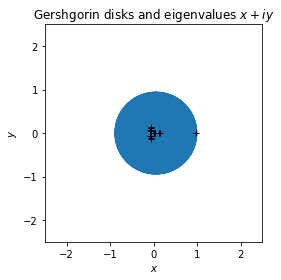

array([[-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.73333333,  0.83333333],
       [-0.73333333,  0.83333333],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.9       ,  1.        ],
       [-0.81666667,  0.91666667]])

In [110]:
gershgorin_disk(H)

In [92]:
inv_shift_pot_method(H, np.ones((n)), 0.3)

(0.14704445954644374,
 array([ 0.4413849 ,  0.20030635, -0.10092796, -0.32069576,  0.46120456,
        -0.02099064, -0.02099064, -0.37156843,  0.30947807,  0.09171545,
        -0.12584265, -0.28576654,  0.1476818 , -0.14518536, -0.23620873]))

In [85]:
inv_shift_pot_method(H, np.ones((n)), 0.1)

(0.11299062302952206,
 array([-0.42962635, -0.31961349, -0.25221479, -0.2527332 , -0.35840876,
         0.25189063,  0.25189063, -0.19962506, -0.0189852 ,  0.15540298,
         0.12203849,  0.0735142 ,  0.28533564,  0.32665838,  0.24009766]))

Für lambda = 0.2 - 26 Iterationen. Für lambda = 0.1 - 9 Iterationen.

In [94]:
rayley_method(H, np.ones((n)), 0.2)

(0.9653682030036259,
 array([-0.26927649, -0.26847856, -0.26845816, -0.26924912, -0.26404657,
        -0.25785321, -0.25785321, -0.26378984, -0.26458908, -0.22340083,
        -0.22144546, -0.26439813, -0.26815869, -0.25984586, -0.24550684]))

In [89]:
rayley_method(H, np.ones((n)), 0.1)

(0.11299062928124357,
 array([-0.42962571, -0.3196132 , -0.25221516, -0.25273412, -0.35840809,
         0.25189067,  0.25189067, -0.19962588, -0.01898491,  0.15540299,
         0.1220386 ,  0.07351378,  0.28533595,  0.32665852,  0.24009759]))

Für lambda = 0.2 - 5 Iterationen. Für lambda = 0.1 - 6 Iterationen.

### Zusammenfassung der Ergebnisse:
Die Konvergenz hängt von dem Quotienten zwischen (Eigenwert(i)/größter Eigenwert) ab.

---

# Aufgabe 5.0

In [131]:
n = 15
q = 0.15
M = np.identity(n) + np.random.uniform(low=0., high=.60, size=(n, n))
M /= M.sum(axis=1, keepdims=1)
print(M)

[[0.24926077 0.08854744 0.0078614  0.11955219 0.02434651 0.0658773
  0.09748795 0.00239225 0.07422242 0.07496745 0.01001911 0.05641409
  0.10059187 0.00412921 0.02433005]
 [0.04920965 0.25368264 0.07511665 0.05218617 0.07406066 0.08188502
  0.03894643 0.05308701 0.05861114 0.06206472 0.01347871 0.07665255
  0.02337191 0.03270904 0.0549377 ]
 [0.01280686 0.10098934 0.20471272 0.00661622 0.07492854 0.08853831
  0.04243286 0.02545272 0.04080253 0.00997518 0.10718833 0.09571122
  0.03991502 0.10654613 0.04338402]
 [0.07278149 0.01070595 0.09416324 0.29688934 0.02694694 0.0038951
  0.03187696 0.00079491 0.05257026 0.03491296 0.05993568 0.05094421
  0.09415998 0.05667621 0.11274677]
 [0.05481074 0.0753315  0.013587   0.06577922 0.2627232  0.03589081
  0.05469341 0.07817841 0.01592657 0.09578055 0.0684942  0.03844349
  0.09743361 0.02613011 0.01679717]
 [0.07135363 0.07508018 0.10694373 0.05918486 0.02112889 0.23225703
  0.00283478 0.03555981 0.04203025 0.05766336 0.0415686  0.02538754
  0.01

In [132]:
I = (1-q) * M + q * (1/n) * np.ones((n, n))
print(I)

[[0.22187165 0.08526532 0.01668219 0.11161936 0.03069453 0.06599571
  0.09286475 0.01203341 0.07308906 0.07372233 0.01851624 0.05795197
  0.09550309 0.01350983 0.03068054]
 [0.0518282  0.22563024 0.07384915 0.05435824 0.07295156 0.07960227
  0.04310447 0.05512395 0.05981947 0.06275501 0.0214569  0.07515467
  0.02986612 0.03780269 0.05669704]
 [0.02088583 0.09584094 0.18400582 0.01562379 0.07368926 0.08525756
  0.04606793 0.03163481 0.04468215 0.0184789  0.10111008 0.09135454
  0.04392777 0.10056421 0.04687641]
 [0.07186427 0.01910006 0.09003875 0.26235594 0.0329049  0.01331084
  0.03709542 0.01067567 0.05468472 0.03967602 0.06094533 0.05330258
  0.09003598 0.05817477 0.10583475]
 [0.05658913 0.07403178 0.02154895 0.06591233 0.23331472 0.04050719
  0.0564894  0.07645165 0.02353759 0.09141347 0.06822007 0.04267697
  0.09281857 0.03221059 0.02427759]
 [0.07065059 0.07381816 0.10090217 0.06030713 0.02795956 0.20741848
  0.01240956 0.04022584 0.04572571 0.05901385 0.04533331 0.0315794
  0.0

In [133]:
potenz_method(I,np.ones((n)))

(0.9999999999999998,
 array([0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
        0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889,
        0.25819889, 0.25819889, 0.25819889, 0.25819889, 0.25819889]))

In [134]:
qr2(I)

(array([0.17969154, 0.21960108, 1.        , 0.27467927, 0.25035777,
        0.20084708, 0.20084708, 0.16941582, 0.16941582, 0.13317498,
        0.11462444, 0.11462444, 0.04459913, 0.04459913, 0.04042138]),
 array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.04474782, -0.04474782,  0.05251604, -0.05251604,  0.        ,
         0.03519319, -0.03519319,  0.03664629, -0.03664629,  0.        ]))

In [ ]:
qr3(I)

In [135]:
np.linalg.eig(I)

(array([1.        +0.j        , 0.04459913+0.03664629j,
        0.04459913-0.03664629j, 0.04042138+0.j        ,
        0.27467927+0.j        , 0.25035777+0.j        ,
        0.219601  +0.j        , 0.20084709+0.04474783j,
        0.20084709-0.04474783j, 0.16941582+0.05251604j,
        0.16941582-0.05251604j, 0.11462444+0.03519319j,
        0.11462444-0.03519319j, 0.17969159+0.j        ,
        0.13317498+0.j        ]),
 array([[ 0.25819889+0.j        , -0.27218688-0.26138655j,
         -0.27218688+0.26138655j,  0.12446257+0.j        ,
         -0.1467984 +0.j        , -0.09134475+0.j        ,
          0.33192526+0.j        ,  0.06237518+0.27108096j,
          0.06237518-0.27108096j, -0.25251818-0.02778306j,
         -0.25251818+0.02778306j,  0.27534229-0.21667646j,
          0.27534229+0.21667646j,  0.1708649 +0.j        ,
         -0.24664742+0.j        ],
        [ 0.25819889+0.j        ,  0.13460949-0.15278726j,
          0.13460949+0.15278726j, -0.11135687+0.j        ,
        

---

# Aufgabe 6.0

In [15]:
qr2(E)

array([ 0.8190294 , -0.2017464 , -0.21735154, -0.26737323, -0.10876988,
       -0.16079832,  0.27531406,  0.04158028, -0.24509192, -0.16339631,
        0.00673982,  0.07259599,  0.0547855 ,  0.13649212,  0.10799042])

In [17]:
qr3(E)

array([ 0.81845855, -0.1259195 , -0.22433477, -0.2482671 , -0.21537661,
       -0.22569868, -0.24812872,  0.3068361 ,  0.03503699,  0.02453302,
       -0.14231252,  0.03718664,  0.11348623,  0.1365095 ,  0.10799087])

In [16]:
eig(E)

(array([ 0.81847279+0.j        , -0.17462502+0.51572036j,
        -0.17462502-0.51572036j,  0.45911425+0.j        ,
        -0.22532044+0.36900172j, -0.22532044-0.36900172j,
        -0.3194382 +0.17914147j, -0.3194382 -0.17914147j,
         0.28354835+0.j        , -0.18333422+0.01855783j,
        -0.18333422-0.01855783j,  0.03630415+0.j        ,
         0.11351409+0.j        ,  0.13649125+0.j        ,
         0.10799087+0.j        ]),
 array([[ 9.99931157e-01+0.00000000e+00j,  4.26084478e-02+1.56970235e-02j,
          4.26084478e-02-1.56970235e-02j, -4.22945103e-01+0.00000000e+00j,
          3.87486753e-02+9.59340554e-02j,  3.87486753e-02-9.59340554e-02j,
         -1.53324042e-02+5.16148543e-02j, -1.53324042e-02-5.16148543e-02j,
         -8.87868652e-02+0.00000000e+00j, -2.03038474e-02-1.40171124e-02j,
         -2.03038474e-02+1.40171124e-02j, -1.80593540e-01+0.00000000e+00j,
         -8.34306884e-02+0.00000000e+00j,  7.16348047e-02+0.00000000e+00j,
         -8.61129537e-02+0.0000000

In [18]:
qr2(F)

array([ 7.33484270e-01, -1.19937305e-01, -1.86688658e-01, -1.09430307e-03,
        1.37422306e-01, -1.76161671e-01,  1.62046039e-02, -4.37276556e-01,
        1.89709060e-01, -1.26507990e-01, -3.04646160e-01,  1.53003036e-01,
        1.22489369e-01,  1.33008783e-16, -2.70900235e-17])

In [19]:
qr3(F)

array([ 7.72182163e-01,  6.40798373e-02,  1.86651005e-01, -1.05035402e-01,
       -3.76590743e-01,  9.49329365e-02,  3.10283277e-02, -4.76120901e-01,
       -1.38886224e-02, -1.67999223e-01, -3.05231173e-02, -1.21032878e-01,
        1.42316617e-01, -9.90154235e-18,  1.32413862e-16])

In [20]:
eig(F)

(array([ 7.72236531e-01+0.j        ,  1.39002465e-01+0.47388775j,
         1.39002465e-01-0.47388775j, -2.56725481e-01+0.37405736j,
        -2.56725481e-01-0.37405736j,  3.30193809e-01+0.j        ,
        -3.38998186e-01+0.10375574j, -3.38998186e-01-0.10375574j,
        -2.06351927e-01+0.17556788j, -2.06351927e-01-0.17556788j,
        -1.07470396e-01+0.j        ,  1.65593157e-01+0.0177516j ,
         1.65593157e-01-0.0177516j , -9.89862006e-18+0.j        ,
         1.32410939e-16+0.j        ]),
 array([[-9.78483399e-01+0.00000000e+00j, -2.23002540e-02+2.01267598e-01j,
         -2.23002540e-02-2.01267598e-01j,  6.28114016e-03+6.90239158e-02j,
          6.28114016e-03-6.90239158e-02j,  1.31429989e-01+0.00000000e+00j,
         -1.51037609e-01+3.36618018e-02j, -1.51037609e-01-3.36618018e-02j,
          4.08210668e-02+4.34565461e-02j,  4.08210668e-02-4.34565461e-02j,
         -4.63207079e-02+0.00000000e+00j, -2.10154079e-01-1.33095970e-02j,
         -2.10154079e-01+1.33095970e-02j, -7.3210

In [21]:
qr2(G)

array([ 0.90490096, -0.1553927 , -0.12898958, -0.06984196, -0.16840319,
       -0.16090237,  0.2336537 , -0.01032151, -0.15287502, -0.09275365,
        0.01307209, -0.14416592,  0.22217748,  0.08785055,  0.07199113])

In [22]:
qr3(G)

array([ 0.904901  , -0.16575955, -0.18475195, -0.0752494 , -0.03429893,
        0.11629024,  0.08659452,  0.07137634, -0.19425903, -0.09954157,
       -0.21399759,  0.08034088, -0.00148672,  0.08785059,  0.07199116])

In [23]:
eig(G)

(array([ 0.904901  +0.j        , -0.17517232+0.35719852j,
        -0.17517232-0.35719852j,  0.25651917+0.05630749j,
         0.25651917-0.05630749j, -0.08741667+0.19918544j,
        -0.08741667-0.19918544j, -0.20100774+0.07713345j,
        -0.20100774-0.07713345j, -0.14314678+0.12655282j,
        -0.14314678-0.12655282j,  0.04285302+0.04312956j,
         0.04285302-0.04312956j,  0.08785051+0.j        ,
         0.07199116+0.j        ]),
 array([[ 1.00000000e+00+0.00000000e+00j, -3.98991203e-03-5.33458737e-02j,
         -3.98991203e-03+5.33458737e-02j, -5.29808910e-02-4.56547671e-02j,
         -5.29808910e-02+4.56547671e-02j,  1.83356856e-02+6.26489450e-02j,
          1.83356856e-02-6.26489450e-02j,  1.47041926e-01-3.53928222e-02j,
          1.47041926e-01+3.53928222e-02j,  1.33842987e-01-9.38159787e-02j,
          1.33842987e-01+9.38159787e-02j,  4.64077860e-02-1.80591811e-02j,
          4.64077860e-02+1.80591811e-02j,  4.57149504e-02+0.00000000e+00j,
         -5.06386135e-02+0.0000000

In [24]:
qr2(H)

array([ 9.65368128e-01, -7.85052384e-02, -7.76349791e-02, -6.88362836e-02,
       -2.90613667e-02, -9.74984184e-02, -7.85585374e-02,  4.45662833e-03,
       -3.36518474e-02,  1.04672579e-01, -8.54720179e-05, -4.98196871e-02,
        1.15952986e-01,  3.34541647e-02,  3.97473447e-02])

In [25]:
qr3(H)

array([ 9.65368169e-01, -3.76812486e-02, -8.76687235e-02, -1.09235628e-01,
       -7.92149945e-02, -6.53233794e-02,  6.36742246e-02,  3.53409841e-02,
        2.95076256e-03,  3.29260569e-02,  5.60367683e-02, -1.00404040e-01,
        2.97696297e-05,  3.34589037e-02,  3.97423751e-02])

In [26]:
eig(H)

(array([ 9.65368169e-01+0.j        , -5.33459982e-02+0.14669913j,
        -5.33459982e-02-0.14669913j,  1.03320985e-01+0.j        ,
         8.65655321e-02+0.05757154j,  8.65655321e-02-0.05757154j,
        -7.86599504e-02+0.11299929j, -7.86599504e-02-0.11299929j,
        -1.15111076e-01+0.j        , -5.22029138e-02+0.04975714j,
        -5.22029138e-02-0.04975714j, -8.18917553e-02+0.j        ,
         4.01008093e-04+0.j        ,  3.34570850e-02+0.j        ,
         3.97422448e-02+0.j        ]),
 array([[-1.00000000e+00+0.00000000e+00j,  2.33811967e-02-2.43586056e-03j,
          2.33811967e-02+2.43586056e-03j, -9.90695085e-03+0.00000000e+00j,
         -6.10970392e-03-9.49496169e-03j, -6.10970392e-03+9.49496169e-03j,
          7.08089187e-03-1.56611664e-03j,  7.08089187e-03+1.56611664e-03j,
         -1.27442082e-02+0.00000000e+00j, -8.00501288e-02-3.77504140e-02j,
         -8.00501288e-02+3.77504140e-02j,  5.06208658e-02+0.00000000e+00j,
          4.67394920e-02+0.00000000e+00j,  1.2029

### Zusammenfassung der Ergebnisse:
Leider können die Markov Matrizen mit dem von mir implementierten Algorithmus qr2 und qr3 nicht berechnet werden. Das liegt vorallem daran, dass der Algorithmus noch schwächen bezüglich den Complexen Eigenwerten hat. Eine effiziente berechnung der Komplexen Eigenwerte fehlt hier.